# logistic regression -- weather report

In [8]:
# download opendatasets library 
!pip install opendatasets

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     ------------------ ------------------- 41.0/82.7 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 664.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=6bd7a0a3d1ed59ae85fa95f9768efc903a6ddcaca9c2bc26215b5e905d81d90f
  Stored in directory: c:\users\windows 11-23h2\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle


In [9]:
import opendatasets as od
data_url= "https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"

In [10]:
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  devansh15


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:01<00:00, 2.61MB/s]


In [11]:
import os

In [15]:
data_dir= "./weather-dataset-rattle-package"

In [16]:
os.listdir(data_dir)

['weatherAUS.csv']

In [32]:
data= data_dir + "/weatherAUS.csv"

In [87]:
df= pd.read_csv(data)

In [42]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [39]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [41]:
df.dropna(subset= ["RainToday","RainTomorrow"],inplace= True)

In [44]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


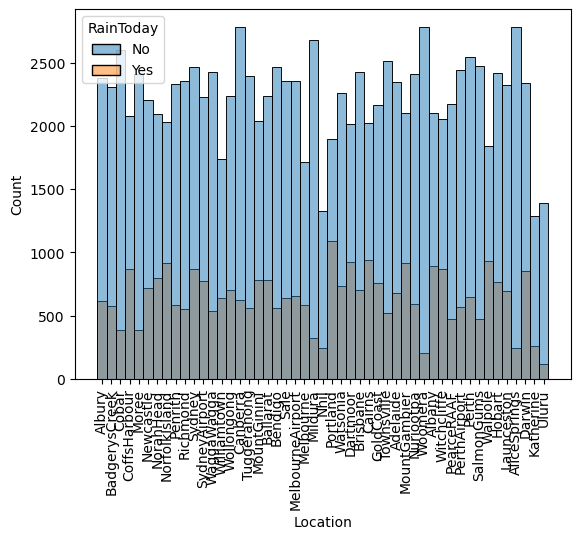

In [49]:
sns.histplot(df,x= "Location",hue= "RainToday")
plt.xticks(rotation= 90);

C:\Users\WINDOWS 11-23H2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 2000.0)

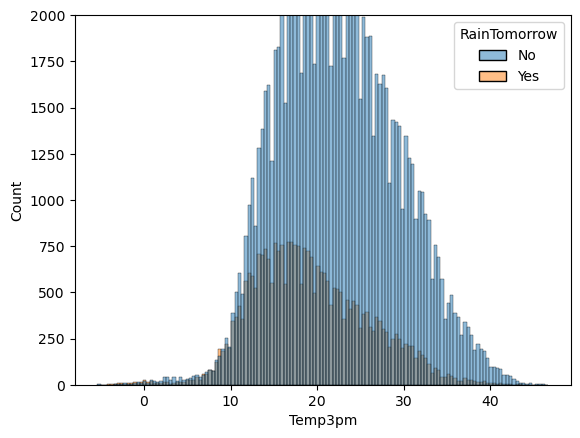

In [55]:
sns.histplot(df, 
             x='Temp3pm', 
             hue='RainTomorrow')
plt.ylim(0,2000)

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

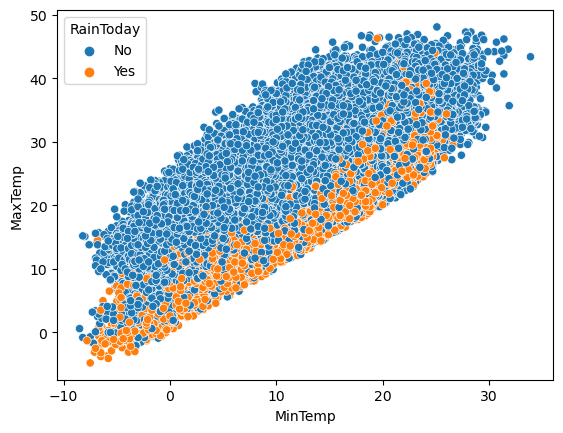

In [59]:
sns.scatterplot(data=df,x= "MinTemp",y= "MaxTemp",hue= "RainToday")

In [90]:
numerical_cols= [features for features in df.columns if df[features].dtypes != "object"]
categorical_cols= [cols for cols in df.columns if df[cols].dtypes == "object"]

In [91]:
for cols in df.columns:
    if cols in numerical_cols:
        df[cols]= df[cols].fillna(df[cols].mean())
    elif cols in categorical_cols:
        df[cols]= df[cols].fillna(df[cols].mode()[0])
    else:
        print(cols)
        

In [77]:
df.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
                     ...   
WindDir3pm_W          int32
WindDir3pm_WNW        int32
WindDir3pm_WSW        int32
RainToday_Yes         int32
RainTomorrow_Yes      int32
Length: 3546, dtype: object

In [89]:
# perform one hot encoding for categorical cols
#df= pd.get_dummies(df,columns= categorical_cols,dtype= int,drop_first= True)

In [74]:
df.shape

(140787, 3546)

In [92]:
from sklearn.model_selection import train_test_split
train_val,test= train_test_split(df,test_size= .2)
train,val= train_test_split(train_val,test_size= .25)

In [88]:
# get the year from dataframe's date column
year= pd.to_datetime(df.Date).dt.year

In [93]:
train_df= df[year < 2015]
val_df= df[year == 2015]
test_df= df[year > 2015]

In [102]:
# train features and labels
train_inputs= train_df.drop("RainTomorrow",axis= 1)
train_targets= train_df.RainTomorrow

In [103]:
# validation features and labels
val_inputs= val_df.drop("RainTomorrow",axis= 1)
val_targets= val_df.RainTomorrow

In [104]:
# test features and labels
test_inputs= test_df.drop("RainTomorrow",axis= 1)
test_targets= test_df.RainTomorrow

In [110]:
train_inputs= pd.get_dummies(train_inputs,columns= dummy,dtype= int,drop_first= True)
val_inputs= pd.get_dummies(val_inputs,columns= dummy,dtype= int,drop_first= True)
test_inputs= pd.get_dummies(test_inputs,columns= dummy,dtype= int,drop_first= True)


In [111]:
test_inputs.shape

(26557, 111)

In [117]:
# make logistic regression model
from sklearn.linear_model import LogisticRegression as LR
model= LR(solver= "liblinear")
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [114]:
del train_inputs["Date"]

In [115]:
del val_inputs["Date"]

In [116]:
del test_inputs["Date"]

In [119]:
model.intercept_

array([0.19509028])

In [120]:
X_train= train_inputs

In [122]:
X_val= val_inputs

In [123]:
X_test= test_inputs

# model evaluation

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score
# make a function to perform evaluation
def predict_and_plot(inputs,targets,name= ''):
    """
    make predictions through data, measure accuracy and plot a confusion matrix
    """
    predictions= model.predict(inputs)
    accuracy= accuracy_score(targets,predictions)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, predictions, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return predictions

Accuracy: 85.23%


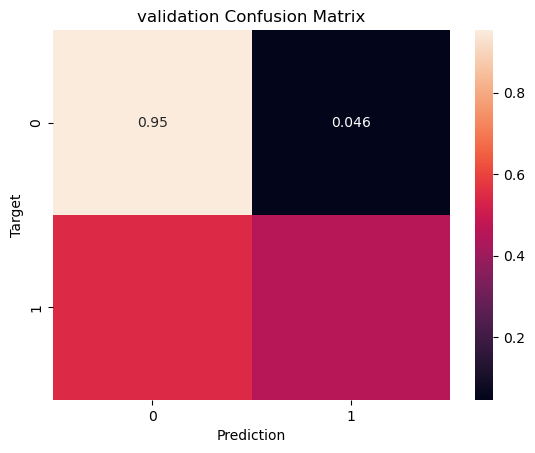

In [128]:
val_pred= predict_and_plot(X_val,val_targets,"validation")